In [ ]:
import numpy as np                                   
import pandas as pd                                   
import os                                            

import matplotlib as mpl                             
import matplotlib.pyplot as plt                      
import seaborn as sns                               
%matplotlib inline

from sklearn.model_selection import train_test_split # To split data into Test/Train
from sklearn.tree import DecisionTreeClassifier      
from sklearn.metrics import accuracy_score           
from sklearn.ensemble import ExtraTreesClassifier    # To calculate feature importance

from sklearn import preprocessing                    
from sklearn.neighbors import KNeighborsClassifier   

from warnings import filterwarnings
filterwarnings(action='ignore')


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import LocalOutlierFactor
from xgboost import XGBClassifier

import pylab as py
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import boxcox

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
plt.rcParams["figure.figsize"] = (20,11) #set global fig size

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('path_to_drive')
df

,Adv link,Data Vendita,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Pdfs links,Indirizzo,Location,Ref prezzo location link,Date_adv,Tipologia,Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
0,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-08,61800.00,1500.0,613/2014,82400.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FILIPPO ARGELATI NR. 44 - 20143 MILANO (MI),Milano(MI),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",93.0,2425.34,53,45.464194,9.189635,45.448728,9.169592
1,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-07,13125.00,500.0,835/2018,17500.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA FRATELLI CAIROLI , 6 E 8 - 45100 ROVIGO (RO)",Rovigo(RO),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,"Negozi, botteghe",27.0,612.00,61,45.069817,11.788820,45.073668,11.800344
2,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-08,103830.28,2078.0,205/2015,138440.38,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA M. STORELLI N.32-34-36 - 76011 BISCEGLIE (BT),Bisceglie(BT),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,"Negozi, botteghe",216.0,933.86,62,41.240274,16.501011,NaN,NaN
3,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-10,209625.00,10000.0,3559/1999,279500.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"C.SO UMBERTO I, 395 - 65015 MONTESILVANO (PE)",Montesilvano(PE),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,Negozio,215.0,533.80,64,42.513603,14.151620,42.502245,14.167511
4,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-24,42480.00,500.0,74/2017,47200.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIALE DON LORENZO MILANI - LOC BORSEA, - 4510...",Rovigo(RO),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,"Negozi, botteghe",83.0,612.00,78,45.069817,11.788820,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-21,17068.14,500.0,373/2002,22757.52,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA BARONCINO - 06069 TUORO SUL TRASIMENO (PG),Trasimeno(PG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-02,Negozio,261.0,374.00,49,43.218459,12.056781,43.216129,12.067070
2844,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-17,90000.00,2000.0,45/2014,90000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA ANTONIANA, 218/B - 35011 CAMPODARSEGO (PD)",Campodarsego(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,Negozio,117.0,935.00,62,45.502855,11.907496,45.494307,11.904827
2845,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-07,141738.00,1300.0,20/2005,188984.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA MONTEGRAPPA, - 89024 POLISTENA (RC)",Polistena(RC),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-05,"Negozi, botteghe",213.0,353.60,63,38.406509,16.077455,38.409031,16.076690
2846,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-08,79200.00,2000.0,627/2014,105600.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FILIPPO ARGELATI NR. 44 - 20143 MILANO (MI),Milano(MI),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",110.0,2425.34,53,45.464194,9.189635,45.448728,9.169592


In [ ]:
print(df.shape)

(2848, 19)


In [ ]:
print(f"The number of unique typologies are {df.Tipologia.nunique()}.\n"
      f"Those unique  variables are {df.Tipologia.unique()}")

df.Tipologia.value_counts()

The number of unique typologies are 31.
Those unique  variables are ['Negozi, botteghe' 'Negozio' 'Abitazione di tipo economico' 'Deposito'
 'Garage o autorimessa' 'Stalle, scuderie, rimesse, autorimesse'
 'Fabbricati costruiti per esigenze commerciali'
 'Magazzini e locali di deposito' 'Laboratori per arti e mestieri'
 'Ufficio' 'Terreno' 'Abitazione di tipo ultrapopolare' 'Fabbricato'
 'Posto auto' 'Laboratorio artigiano' 'Uffici e studi privati'
 'Lastrico solare' 'Magazzino' 'Abitazione di tipo popolare'
 'Edifici a destinazione particolare' 'Abitazione di tipo civile'
 'Fabbricato in corso di costruzione' 'Albergo e pensione'
 'Attrezzature ed utensili' 'Alberghi e pensioni'
 'Fabbricati, locali sportivi con fini di lucro'
 'Magazzini sotterranei, deposito di derrate'
 'Fabbricati costruiti per esigenze industriali' 'Cantina' 'Opifici'
 'Compendio pignorato']


Negozi, botteghe                                 1767
Negozio                                           794
Magazzini e locali di deposito                     46
Stalle, scuderie, rimesse, autorimesse             33
Terreno                                            33
Garage o autorimessa                               32
Fabbricati costruiti per esigenze commerciali      29
Ufficio                                            11
Magazzino                                          11
Uffici e studi privati                             11
Laboratori per arti e mestieri                     11
Deposito                                           10
Posto auto                                          9
Edifici a destinazione particolare                  8
Abitazione di tipo economico                        7
Albergo e pensione                                  6
Laboratorio artigiano                               5
Abitazione di tipo ultrapopolare                    3
Abitazione di tipo civile   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Adv link                  2848 non-null   object 
 1   Data Vendita              2848 non-null   object 
 2   Offerta MIn (Euro)        2848 non-null   float64
 3   Rialzo Min (Euro)         2848 non-null   float64
 4   ID Procedura              2848 non-null   object 
 5   Prezzo asta (Euro)        2848 non-null   float64
 6   Pdfs links                2848 non-null   object 
 7   Indirizzo                 2848 non-null   object 
 8   Location                  2848 non-null   object 
 9   Ref prezzo location link  2848 non-null   object 
 10  Date_adv                  2848 non-null   object 
 11  Tipologia                 2848 non-null   object 
 12  Superficie                2848 non-null   float64
 13  mean_price_at_mq (Euro)   2848 non-null   float64
 14  Attesa v

In [ ]:
df.describe()

,Offerta MIn (Euro),Rialzo Min (Euro),Prezzo asta (Euro),Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
count,2.848000e+03,2848.000000,2.848000e+03,2848.000000,2848.000000,2848.000000,2801.000000,2801.000000,1346.000000,1346.000000
mean,1.317692e+05,3839.914817,1.577346e+05,226.691362,701.223736,72.193118,41.247338,12.606929,42.527880,12.803280
std,9.650113e+05,37698.061649,9.556032e+05,1701.471043,496.132927,24.468296,8.094452,14.518243,2.609573,2.654617
min,0.000000e+00,0.000000,0.000000e+00,1.000000,68.000000,3.000000,-38.293300,-121.800629,36.761601,6.859950
25%,2.519150e+04,1000.000000,3.569063e+04,55.000000,401.200000,55.000000,40.335126,11.199224,40.846498,10.897301
50%,5.100000e+04,1500.000000,6.945485e+04,88.000000,561.000000,66.000000,41.893320,12.887628,42.487530,12.628636
75%,9.935475e+04,3000.000000,1.310000e+05,165.250000,816.000000,87.250000,44.783570,15.543259,45.073668,14.934990
max,3.307500e+07,1000000.000000,2.710823e+07,78638.000000,2448.000000,221.000000,52.278720,147.293503,46.537786,18.166708


In [ ]:
print(df.isna().sum())

Adv link                       0
Data Vendita                   0
Offerta MIn (Euro)             0
Rialzo Min (Euro)              0
ID Procedura                   0
Prezzo asta (Euro)             0
Pdfs links                     0
Indirizzo                      0
Location                       0
Ref prezzo location link       0
Date_adv                       0
Tipologia                      0
Superficie                     0
mean_price_at_mq (Euro)        0
Attesa vendita (giorni)        0
latitudine_città              47
longitudine_città             47
latitudine_indirizzo        1502
longitudine_indirizzo       1502
dtype: int64


In [ ]:
df.groupby('Tipologia').mean()

,Offerta MIn (Euro),Rialzo Min (Euro),Prezzo asta (Euro),Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
Tipologia,,,,,,,,,,
Abitazione di tipo civile,1.770549e+05,1666.666667,1.971843e+05,149.333333,929.333333,72.666667,44.126702,11.577751,44.094153,11.578727
Abitazione di tipo economico,1.265572e+05,2214.285714,1.687429e+05,52.571429,786.371429,64.571429,45.726856,11.595743,45.966157,10.609543
Abitazione di tipo popolare,6.674872e+05,23833.333333,8.899829e+05,73.666667,570.066667,74.333333,42.503597,14.361251,41.279353,14.565189
Abitazione di tipo ultrapopolare,1.582960e+04,1000.000000,2.112391e+04,50.666667,674.333333,102.666667,41.105164,16.121282,40.877474,16.367138
Alberghi e pensioni,1.800000e+05,5000.000000,2.400000e+05,665.000000,816.000000,103.000000,45.233321,11.465778,NaN,NaN
Albergo e pensione,1.222905e+07,668500.000000,1.630540e+07,1176.500000,1260.266667,78.833333,40.112737,13.791323,NaN,NaN
Attrezzature ed utensili,6.883217e+04,2000.000000,9.177623e+04,60.000000,314.500000,60.500000,44.146864,10.035070,44.134500,10.017545
Cantina,4.250000e+04,0.000000,4.250000e+04,57.000000,532.660000,51.000000,45.956250,12.659720,NaN,NaN
Compendio pignorato,5.422000e+04,5000.000000,7.229333e+04,86.333333,2448.000000,86.000000,41.893320,12.482932,41.834466,12.575566


Vedendo che vi sono stesse categorie con nomi diversi che hanno valori medi abbastanza simili per uniformare le classi cambiamo:
- 'Ufficio' in 'Uffici e studi privati' .
- 'Negozio' in 'Negozi, botteghe'.
- 'Magazzino', 'Deposito' e 'Magazzini sotterranei, deposito di derrate' in 'Magazzini e locali di deposito'.
- 'Laboratorio artigiano' in 'Laboratori per arti e mestieri'.
- 'Fabbricati costruiti per esigenze commerciali', 'Fabbricati costruiti per esigenze industriali', 'Fabbricati, locali sportivi con fini di lucro', 'Fabbricato in corso di costruzione' in 'Fabbricato'.
- 'Garage o autorimessa' in 'Stalle, scuderie, rimesse, autorimesse'
N.B. Non tocchiamo i posti auto in quanto i valori sono diversi per media ed è più probabile che non siano infrastrutture ma posti auto riservati in città.
- Alberghi e pensioni'in 'Albergo e pensione'.

In [ ]:
df['Tipologia'] = df['Tipologia'].replace('Ufficio', 'Uffici e studi privati')
df['Tipologia'] = df['Tipologia'].replace('Negozio', 'Negozi, botteghe')
df['Tipologia'] = df['Tipologia'].replace('Magazzino', 'Magazzini e locali di deposito')
df['Tipologia'] = df['Tipologia'].replace('Deposito', 'Magazzini e locali di deposito')
df['Tipologia'] = df['Tipologia'].replace('Magazzini sotterranei, deposito di derrate', 'Magazzini e locali di deposito')
df['Tipologia'] = df['Tipologia'].replace('Laboratorio artigiano', 'Laboratori per arti e mestieri')
df['Tipologia'] = df['Tipologia'].replace('Fabbricati costruiti per esigenze commerciali', 'Fabbricato')
df['Tipologia'] = df['Tipologia'].replace('Fabbricati costruiti per esigenze industriali', 'Fabbricato')
df['Tipologia'] = df['Tipologia'].replace('Fabbricati, locali sportivi con fini di lucro', 'Fabbricato')
df['Tipologia'] = df['Tipologia'].replace('Fabbricato in corso di costruzione', 'Fabbricato')
df['Tipologia'] = df['Tipologia'].replace('Garage o autorimessa', 'Stalle, scuderie, rimesse, autorimesse')
df['Tipologia'] = df['Tipologia'].replace('Alberghi e pensioni', 'Albergo e pensione')

In [ ]:
print(f"The number of unique typologies are {df.Tipologia.nunique()}.\n"
      f"Those unique  variables are {df.Tipologia.unique()}")

df.Tipologia.value_counts()

The number of unique typologies are 19.
Those unique  variables are ['Negozi, botteghe' 'Abitazione di tipo economico'
 'Magazzini e locali di deposito' 'Stalle, scuderie, rimesse, autorimesse'
 'Fabbricato' 'Laboratori per arti e mestieri' 'Uffici e studi privati'
 'Terreno' 'Abitazione di tipo ultrapopolare' 'Posto auto'
 'Lastrico solare' 'Abitazione di tipo popolare'
 'Edifici a destinazione particolare' 'Abitazione di tipo civile'
 'Albergo e pensione' 'Attrezzature ed utensili' 'Cantina' 'Opifici'
 'Compendio pignorato']


Negozi, botteghe                          2561
Magazzini e locali di deposito              68
Stalle, scuderie, rimesse, autorimesse      65
Fabbricato                                  35
Terreno                                     33
Uffici e studi privati                      22
Laboratori per arti e mestieri              16
Posto auto                                   9
Edifici a destinazione particolare           8
Abitazione di tipo economico                 7
Albergo e pensione                           7
Abitazione di tipo ultrapopolare             3
Abitazione di tipo popolare                  3
Abitazione di tipo civile                    3
Compendio pignorato                          3
Attrezzature ed utensili                     2
Lastrico solare                              1
Cantina                                      1
Opifici                                      1
Name: Tipologia, dtype: int64

In [ ]:
print(df.isna().sum())

Adv link                       0
Data Vendita                   0
Offerta MIn (Euro)             0
Rialzo Min (Euro)              0
ID Procedura                   0
Prezzo asta (Euro)             0
Pdfs links                     0
Indirizzo                      0
Location                       0
Ref prezzo location link       0
Date_adv                       0
Tipologia                      0
Superficie                     0
mean_price_at_mq (Euro)        0
Attesa vendita (giorni)        0
latitudine_città              47
longitudine_città             47
latitudine_indirizzo        1502
longitudine_indirizzo       1502
dtype: int64


In [ ]:
#there are many NaN values, let's try to remove NaNs as results of invalid addresses coordinates
df_removed = df.dropna()
df_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 2847
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Adv link                  1316 non-null   object 
 1   Data Vendita              1316 non-null   object 
 2   Offerta MIn (Euro)        1316 non-null   float64
 3   Rialzo Min (Euro)         1316 non-null   float64
 4   ID Procedura              1316 non-null   object 
 5   Prezzo asta (Euro)        1316 non-null   float64
 6   Pdfs links                1316 non-null   object 
 7   Indirizzo                 1316 non-null   object 
 8   Location                  1316 non-null   object 
 9   Ref prezzo location link  1316 non-null   object 
 10  Date_adv                  1316 non-null   object 
 11  Tipologia                 1316 non-null   object 
 12  Superficie                1316 non-null   float64
 13  mean_price_at_mq (Euro)   1316 non-null   float64
 14  Attesa v

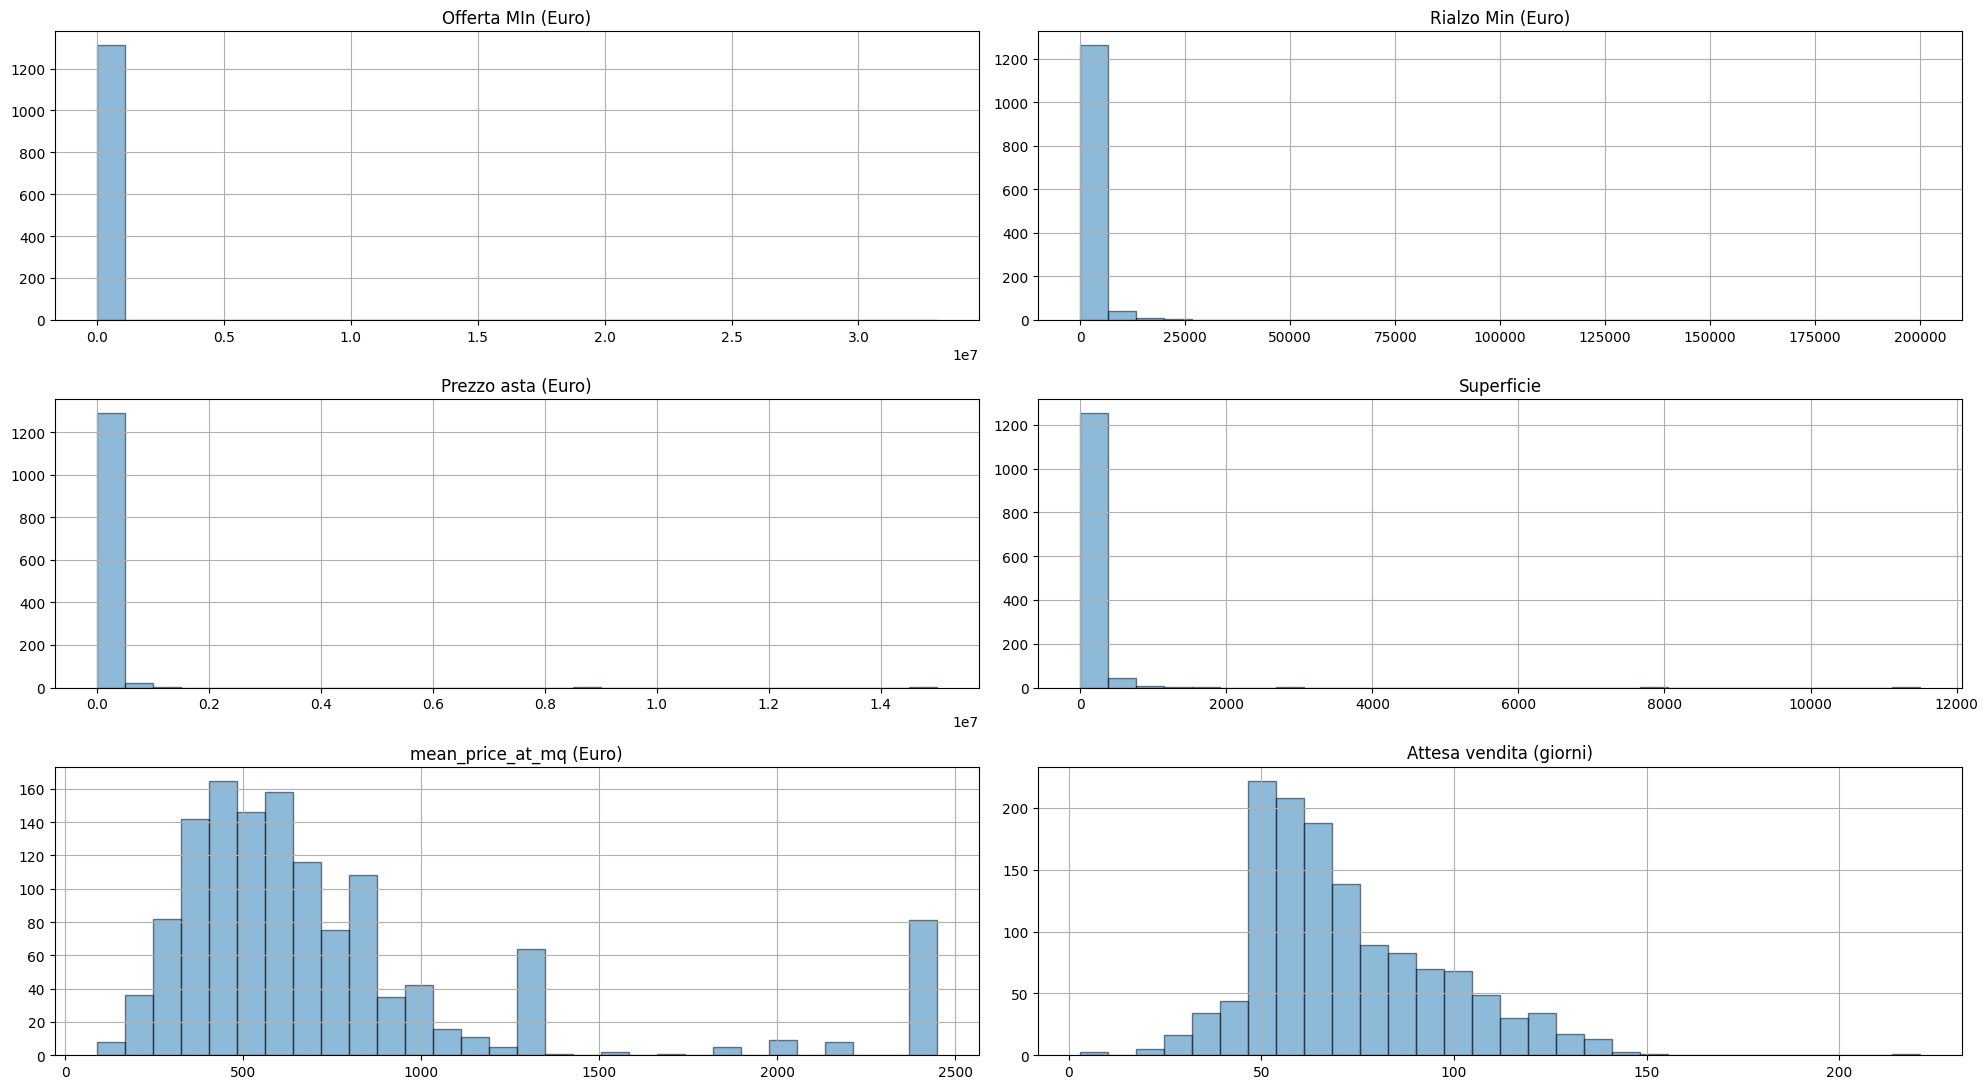

In [ ]:
df_removed.iloc[:, [2, 3, 5, 12, 13, 14]].hist(bins = 30, alpha = 0.5, edgecolor = 'black')
plt.tight_layout()
plt.show()

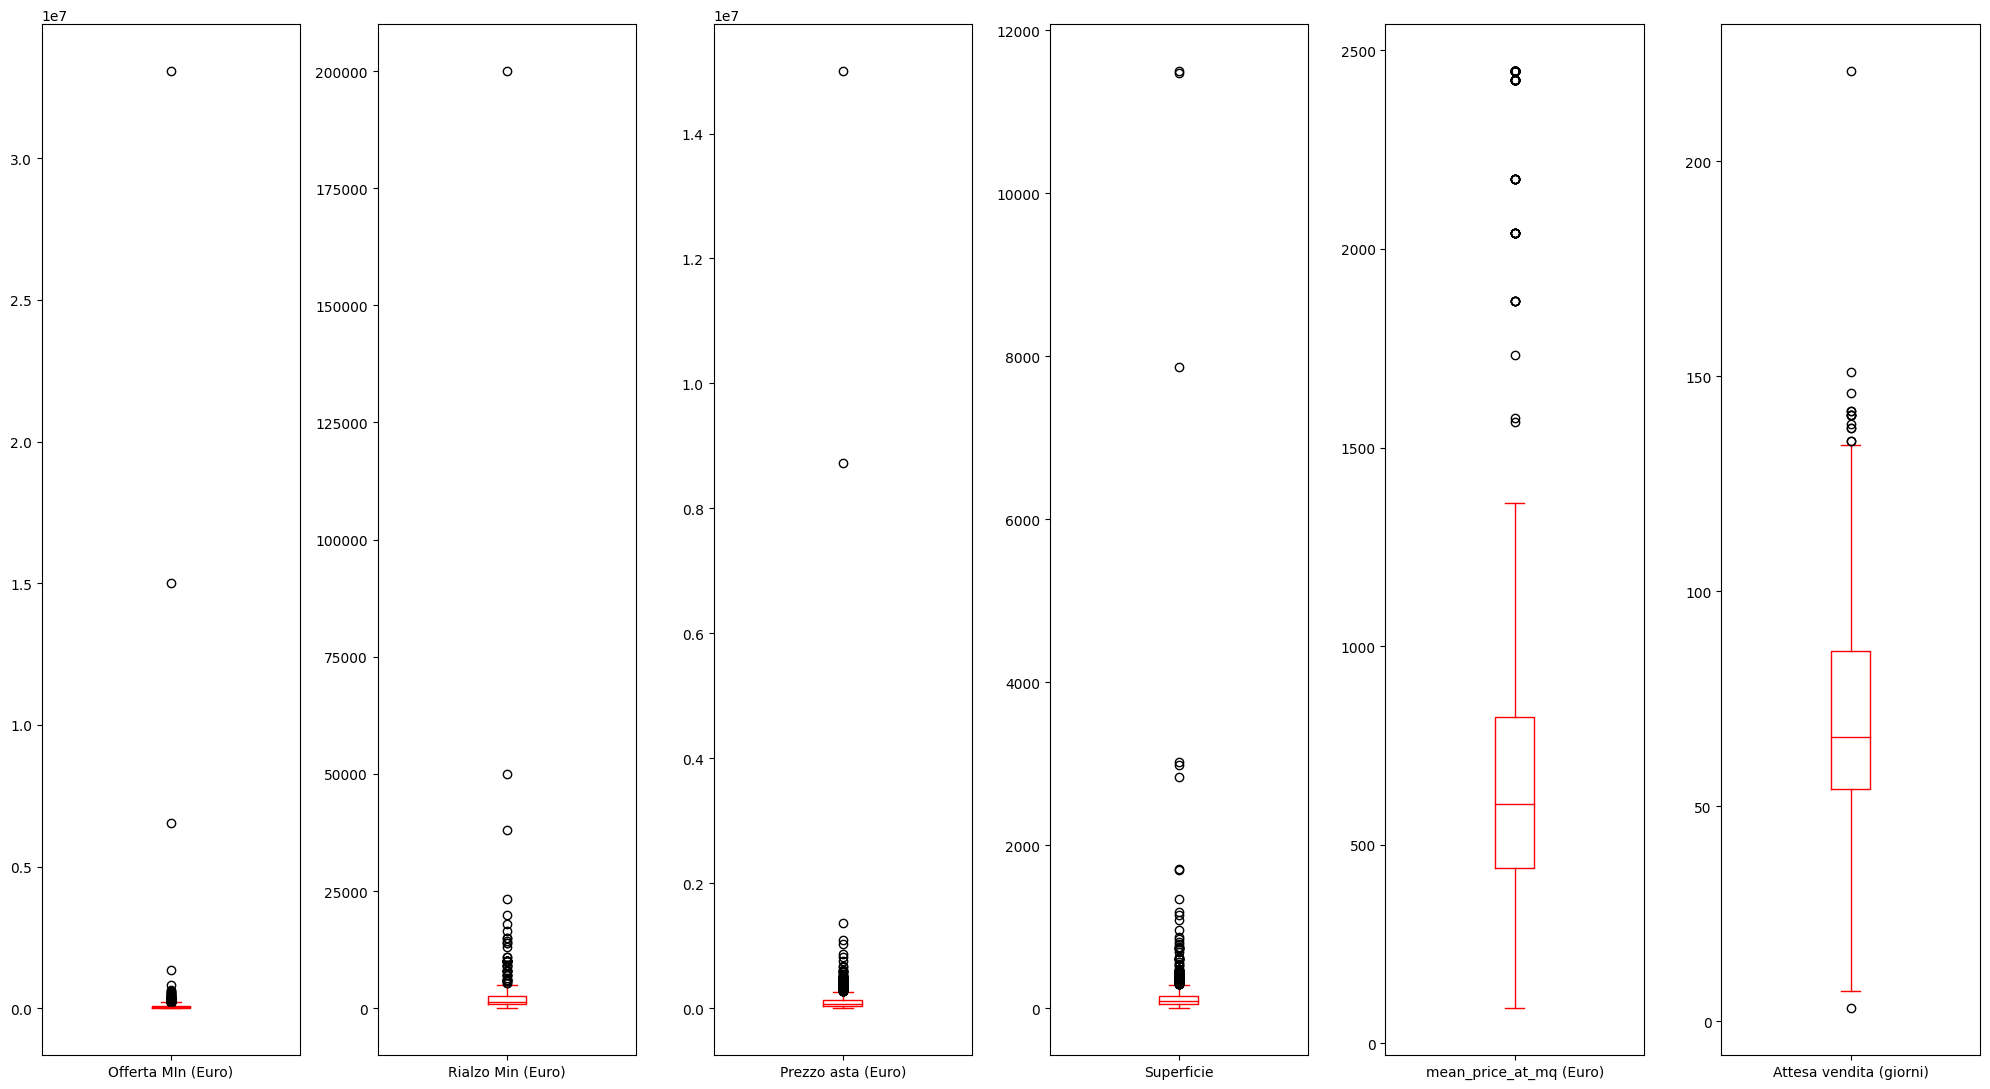

In [ ]:
df_removed.iloc[:, [2, 3, 5, 12, 13, 14]].plot(kind='box', subplots = True, color = 'red')
plt.tight_layout()

Correggiamo gli outliers

In [ ]:
df_cleaned = df_removed[(df_removed['Prezzo asta (Euro)'] < df_removed['Prezzo asta (Euro)'].quantile(0.90)) &
(df_removed['Rialzo Min (Euro)'] < df_removed['Rialzo Min (Euro)'].quantile(0.90)) &
(df_removed['Offerta MIn (Euro)'] < df_removed['Offerta MIn (Euro)'].quantile(0.90)) &
(df_removed['Superficie'] < df_removed['Superficie'].quantile(0.90))]

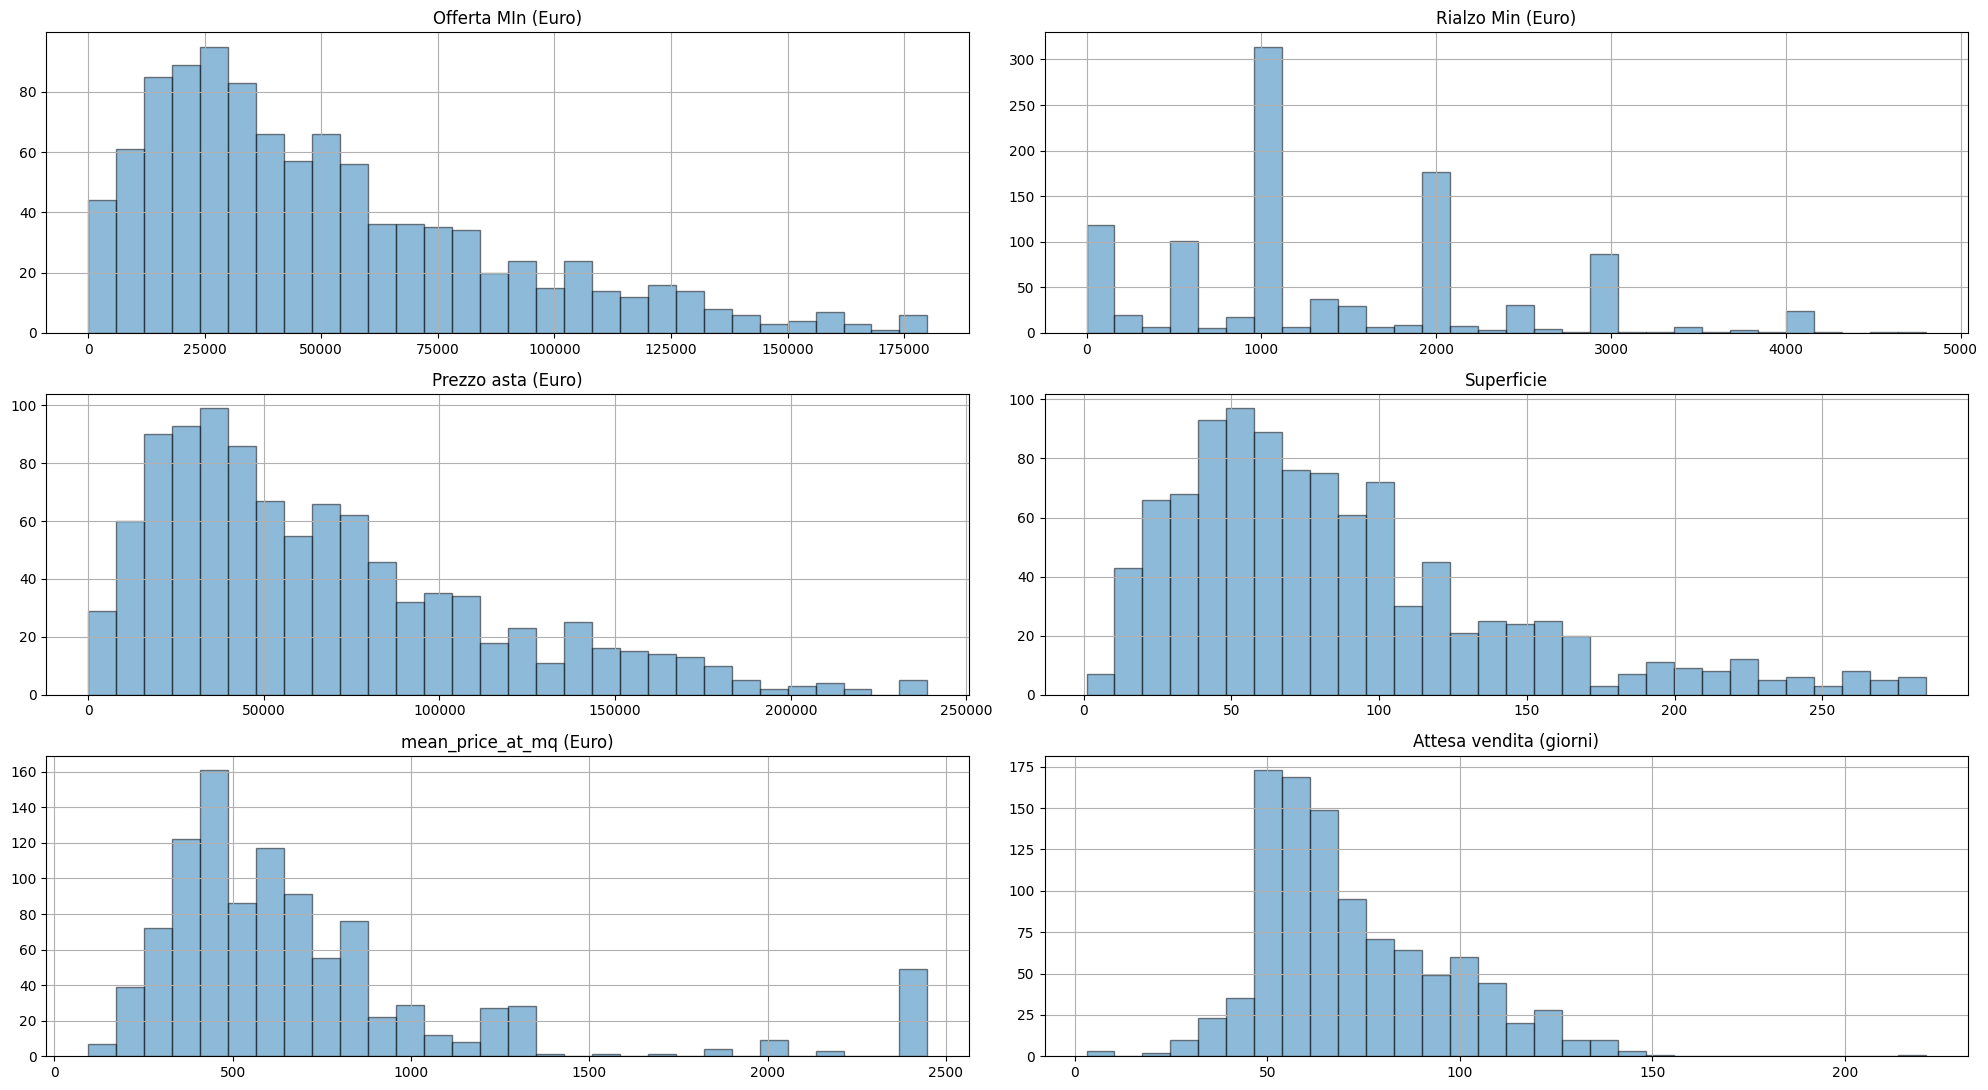

In [ ]:
df_cleaned.iloc[:, [2, 3, 5, 12, 13, 14]].hist(bins = 30, alpha = 0.5, edgecolor = 'black')
plt.tight_layout()
plt.show()

In [ ]:
len(df_cleaned)

1020

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_cleaned.iloc[:, [2, 3, 5, 12, 13, 14]]))
print(z)

      Offerta MIn (Euro)  Rialzo Min (Euro)  Prezzo asta (Euro)  Superficie  \
0               0.310932           0.126053            0.343818    0.117783   
1               1.000454           0.887808            1.031348    1.047415   
9               0.323513           0.380878            0.320523    0.718037   
11              0.524799           0.380878            0.532559    0.294329   
14              0.630315           0.632983            0.643206    0.394198   
...                  ...                ...                 ...         ...   
2843            0.894219           0.887808            0.919946    3.083743   
2844            1.070688           0.632983            0.504854    0.541492   
2845            2.464597           0.076720            2.602225    2.236326   
2846            0.779718           0.632983            0.835402    0.417910   
2847            0.599208           3.471794            0.643854    0.270616   

      mean_price_at_mq (Euro)  Attesa vendita (gior

In [ ]:
threshold = 3
outliers = (np.where(z > 3))
outliers

(array([   0,   31,   35,   39,   43,   46,   47,   57,   57,   58,   89,
          89,   93,  100,  104,  119,  146,  165,  185,  257,  276,  298,
         301,  311,  324,  332,  343,  380,  417,  427,  428,  429,  430,
         431,  446,  450,  450,  451,  464,  474,  549,  563,  611,  625,
         646,  647,  654,  655,  663,  664,  665,  666,  669,  669,  670,
         670,  687,  691,  713,  741,  742,  772,  779,  796,  802,  811,
         824,  825,  839,  848,  852,  880,  897,  902,  906,  906,  910,
         911,  927,  932,  958,  960,  972,  973,  973,  977,  982,  990,
         997,  998, 1007, 1015, 1018, 1019]),
 array([4, 4, 4, 0, 4, 2, 3, 0, 2, 4, 2, 4, 4, 4, 3, 3, 4, 2, 3, 0, 4, 4,
        2, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 0, 2, 3, 5, 5, 0, 3, 4, 4,
        4, 4, 4, 4, 3, 3, 3, 3, 0, 2, 0, 2, 4, 4, 3, 4, 4, 4, 4, 3, 4, 5,
        4, 4, 4, 3, 0, 4, 3, 4, 0, 2, 4, 4, 4, 4, 4, 2, 3, 0, 2, 4, 3, 4,
        4, 4, 1, 3, 4, 1]))

In [ ]:
df_cleaned.describe()

,Offerta MIn (Euro),Rialzo Min (Euro),Prezzo asta (Euro),Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,50259.064824,1375.670706,66173.754333,86.328431,718.861422,71.777451,41.382192,13.051559,42.401603,12.867806
std,37135.410613,986.812253,47217.474327,56.670500,499.488415,24.303981,8.900306,14.857101,2.622640,2.763234
min,0.000000,0.000000,0.000000,1.000000,95.200000,3.000000,-38.293300,-121.800629,36.830333,7.322159
25%,22491.562500,850.000000,30360.000000,47.000000,421.600000,54.000000,40.674860,10.664714,40.743015,10.882400
50%,40500.000000,1000.000000,54000.000000,73.000000,581.400000,66.000000,42.469613,12.640547,42.467339,12.719113
75%,70050.000000,2000.000000,90050.000000,110.500000,816.000000,87.250000,44.952782,15.543259,44.961677,15.287851
max,180000.000000,4800.000000,238911.000000,285.000000,2448.000000,221.000000,51.535006,147.293503,46.504708,18.166708


In [ ]:
df_cleaned

,Adv link,Data Vendita,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Pdfs links,Indirizzo,Location,Ref prezzo location link,Date_adv,Tipologia,Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
0,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-08,61800.00,1500.0,613/2014,82400.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FILIPPO ARGELATI NR. 44 - 20143 MILANO (MI),Milano(MI),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",93.0,2425.34,53,45.464194,9.189635,45.448728,9.169592
1,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-07,13125.00,500.0,835/2018,17500.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA FRATELLI CAIROLI , 6 E 8 - 45100 ROVIGO (RO)",Rovigo(RO),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,"Negozi, botteghe",27.0,612.00,61,45.069817,11.788820,45.073668,11.800344
9,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-16,38251.16,1000.0,471/2016,51046.88,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA RAVIZZA , 1-9 BERGAMO (BG)",Bergamo(BG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-09,"Negozi, botteghe",127.0,822.80,68,45.694495,9.669873,45.679967,9.659337
11,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-02-12,30780.00,1000.0,78/2012,41040.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA PANORAMICA, 3 - 32036 SEDICO (BL)",Sedico(BL),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",103.0,612.00,91,46.110980,12.097155,46.097726,12.086991
14,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-11,26863.54,2000.0,86/2011,35818.06,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FERRIERA 11 - 83100 AVELLINO (AV),Avellino(AV),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",64.0,782.00,59,28.431175,-81.447483,40.914108,14.794127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-21,17068.14,500.0,373/2002,22757.52,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA BARONCINO - 06069 TUORO SUL TRASIMENO (PG),Trasimeno(PG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-02,"Negozi, botteghe",261.0,374.00,49,43.218459,12.056781,43.216129,12.067070
2844,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-17,90000.00,2000.0,45/2014,90000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA ANTONIANA, 218/B - 35011 CAMPODARSEGO (PD)",Campodarsego(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",117.0,935.00,62,45.502855,11.907496,45.494307,11.904827
2845,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-07,141738.00,1300.0,20/2005,188984.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA MONTEGRAPPA, - 89024 POLISTENA (RC)",Polistena(RC),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-05,"Negozi, botteghe",213.0,353.60,63,38.406509,16.077455,38.409031,16.076690
2846,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-08,79200.00,2000.0,627/2014,105600.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FILIPPO ARGELATI NR. 44 - 20143 MILANO (MI),Milano(MI),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",110.0,2425.34,53,45.464194,9.189635,45.448728,9.169592


In [ ]:
df_clean = df_cleaned.iloc[:, [2, 3, 5, 12, 13, 14]][(np.abs(stats.zscore(df_cleaned.iloc[:, [2, 3, 5, 12, 13, 14]])) < 3).all(axis=1)]

In [ ]:
fd = df_cleaned.loc[df_clean.index]
fd

,Adv link,Data Vendita,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Pdfs links,Indirizzo,Location,Ref prezzo location link,Date_adv,Tipologia,Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
1,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-07,13125.00,500.0,835/2018,17500.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA FRATELLI CAIROLI , 6 E 8 - 45100 ROVIGO (RO)",Rovigo(RO),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,"Negozi, botteghe",27.0,612.00,61,45.069817,11.788820,45.073668,11.800344
9,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-16,38251.16,1000.0,471/2016,51046.88,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA RAVIZZA , 1-9 BERGAMO (BG)",Bergamo(BG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-09,"Negozi, botteghe",127.0,822.80,68,45.694495,9.669873,45.679967,9.659337
11,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-02-12,30780.00,1000.0,78/2012,41040.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA PANORAMICA, 3 - 32036 SEDICO (BL)",Sedico(BL),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",103.0,612.00,91,46.110980,12.097155,46.097726,12.086991
14,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-11,26863.54,2000.0,86/2011,35818.06,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FERRIERA 11 - 83100 AVELLINO (AV),Avellino(AV),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",64.0,782.00,59,28.431175,-81.447483,40.914108,14.794127
20,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-22,66000.00,1000.0,66/2017,88000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA SAN FILIPPO, - 35043 MONSELICE (PD)",Monselice(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-15,"Negozi, botteghe",176.0,1088.00,68,45.241768,11.750853,45.236903,11.748292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-12,36150.00,500.0,1061/2017,48200.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA BEZZECCA, 20 BRESCIA (BS)",Brescia(BS),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-10-29,"Negozi, botteghe",24.0,1122.00,44,45.539802,10.220021,45.548406,10.219943
2840,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-04,29953.13,2000.0,356/2013,39937.50,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIALE SCALA GRECA N. 81 - 96100 SIRACUSA (SR),Siracusa(SR),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-01,"Negozi, botteghe",89.0,834.14,64,37.064614,15.290720,37.084033,15.274380
2841,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-21,21421.50,500.0,373/2002,28562.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA ROMA - 06069 TUORO SUL TRASIMENO (PG),Trasimeno(PG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-02,"Negozi, botteghe",102.0,374.00,49,43.218459,12.056781,43.211568,12.073004
2844,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-17,90000.00,2000.0,45/2014,90000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA ANTONIANA, 218/B - 35011 CAMPODARSEGO (PD)",Campodarsego(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",117.0,935.00,62,45.502855,11.907496,45.494307,11.904827


In [ ]:
fd.describe()

,Offerta MIn (Euro),Rialzo Min (Euro),Prezzo asta (Euro),Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,48633.239904,1338.940364,63846.148124,83.158628,631.381104,72.139335,41.373772,12.967552,42.410323,12.899664
std,34620.878426,961.601424,43959.310656,51.326299,322.234827,23.910417,8.902488,14.883509,2.653686,2.807136
min,0.000000,0.000000,0.000000,1.000000,95.200000,3.000000,-38.293300,-121.800629,36.830333,7.322159
25%,22466.250000,677.380000,30118.000000,47.000000,419.900000,55.000000,40.617515,10.635485,40.678433,10.813055
50%,39833.000000,1000.000000,52875.000000,73.000000,564.400000,66.000000,42.519589,12.860439,42.506332,13.013410
75%,67725.000000,2000.000000,87200.000000,107.000000,765.000000,88.000000,45.000461,15.543259,45.002653,15.379453
max,158625.000000,4085.100000,205500.000000,253.000000,2176.000000,142.000000,51.535006,147.293503,46.504708,18.166708


In [ ]:
real_estate_df = fd.drop(fd[(fd['Superficie'] < 2) ].index)
real_eastate_d = real_estate_df.drop(real_estate_df[(real_estate_df['Prezzo asta (Euro)'] < 5) ].index)
dataset_clean = real_eastate_d.drop(real_eastate_d[(real_eastate_d['Offerta MIn (Euro)'] < 5) ].index)

In [ ]:
dataset_clean.describe()

,Offerta MIn (Euro),Rialzo Min (Euro),Prezzo asta (Euro),Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,49324.333874,1337.207138,63819.794559,83.608270,629.910392,72.330794,41.438328,12.818638,42.408269,12.893633
std,34393.362935,961.526064,43817.505474,51.496906,322.428249,23.989001,8.569178,14.323184,2.653320,2.815730
min,801.000000,0.000000,1068.000000,5.000000,95.200000,3.000000,-38.293300,-121.800629,36.830333,7.322159
25%,23038.780000,663.690000,30320.000000,47.000000,418.200000,55.000000,40.623519,10.435668,40.678433,10.772493
50%,40500.000000,1000.000000,52627.000000,73.000000,564.400000,66.000000,42.519589,12.860439,42.487530,13.013410
75%,68242.500000,2000.000000,87100.000000,110.000000,765.000000,89.000000,44.977130,15.543259,45.002653,15.457342
max,158625.000000,4085.100000,205500.000000,253.000000,2176.000000,142.000000,51.535006,147.293503,46.504708,18.166708


In [ ]:
dataset_clean

,Adv link,Data Vendita,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Pdfs links,Indirizzo,Location,Ref prezzo location link,Date_adv,Tipologia,Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
1,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-07,13125.00,500.0,835/2018,17500.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA FRATELLI CAIROLI , 6 E 8 - 45100 ROVIGO (RO)",Rovigo(RO),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,"Negozi, botteghe",27.0,612.00,61,45.069817,11.788820,45.073668,11.800344
9,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-16,38251.16,1000.0,471/2016,51046.88,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA RAVIZZA , 1-9 BERGAMO (BG)",Bergamo(BG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-09,"Negozi, botteghe",127.0,822.80,68,45.694495,9.669873,45.679967,9.659337
11,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-02-12,30780.00,1000.0,78/2012,41040.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA PANORAMICA, 3 - 32036 SEDICO (BL)",Sedico(BL),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",103.0,612.00,91,46.110980,12.097155,46.097726,12.086991
14,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-11,26863.54,2000.0,86/2011,35818.06,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FERRIERA 11 - 83100 AVELLINO (AV),Avellino(AV),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",64.0,782.00,59,28.431175,-81.447483,40.914108,14.794127
20,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-22,66000.00,1000.0,66/2017,88000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA SAN FILIPPO, - 35043 MONSELICE (PD)",Monselice(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-15,"Negozi, botteghe",176.0,1088.00,68,45.241768,11.750853,45.236903,11.748292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-12,36150.00,500.0,1061/2017,48200.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA BEZZECCA, 20 BRESCIA (BS)",Brescia(BS),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-10-29,"Negozi, botteghe",24.0,1122.00,44,45.539802,10.220021,45.548406,10.219943
2840,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-04,29953.13,2000.0,356/2013,39937.50,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIALE SCALA GRECA N. 81 - 96100 SIRACUSA (SR),Siracusa(SR),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-01,"Negozi, botteghe",89.0,834.14,64,37.064614,15.290720,37.084033,15.274380
2841,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-21,21421.50,500.0,373/2002,28562.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA ROMA - 06069 TUORO SUL TRASIMENO (PG),Trasimeno(PG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-02,"Negozi, botteghe",102.0,374.00,49,43.218459,12.056781,43.211568,12.073004
2844,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-17,90000.00,2000.0,45/2014,90000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA ANTONIANA, 218/B - 35011 CAMPODARSEGO (PD)",Campodarsego(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",117.0,935.00,62,45.502855,11.907496,45.494307,11.904827


<Figure size 3000x1400 with 0 Axes>

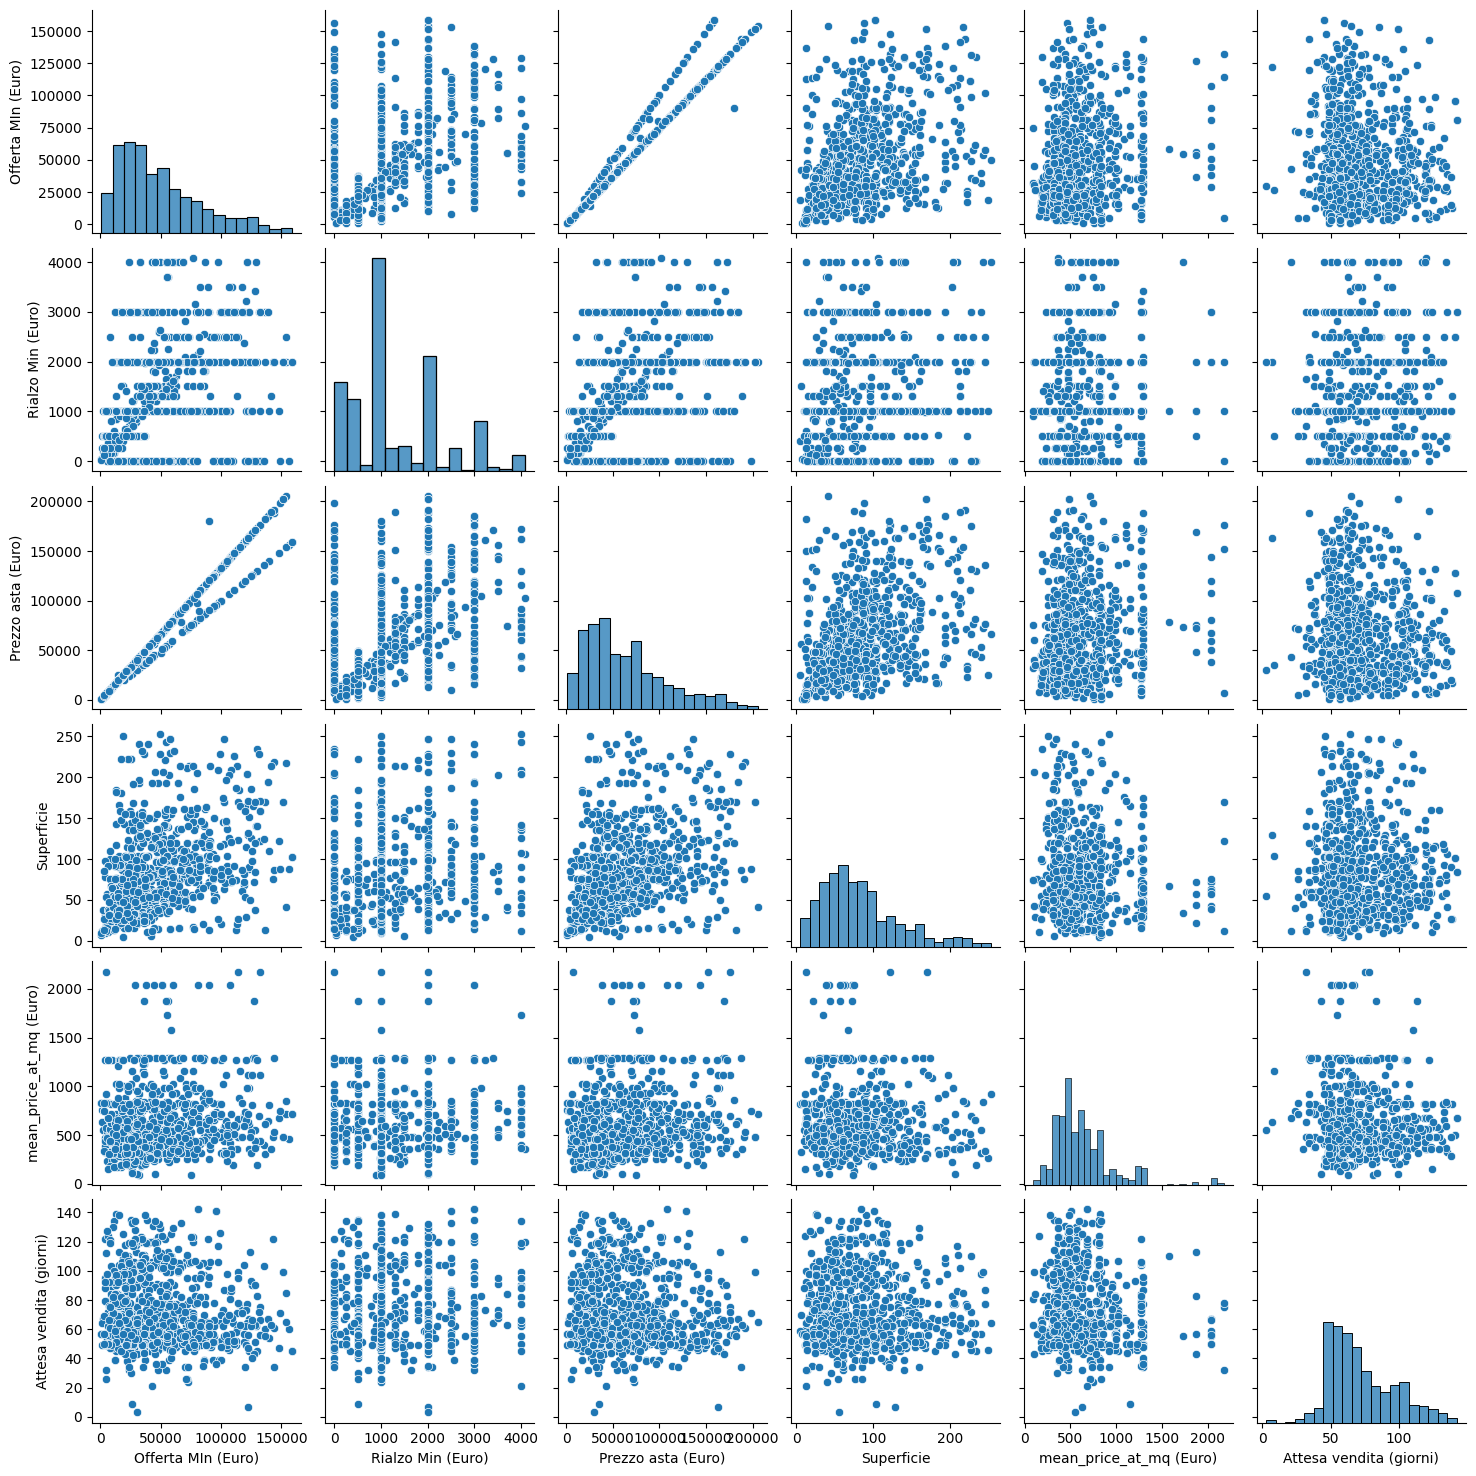

In [ ]:
plt.figure(figsize=(30,14))
sns.pairplot(dataset_clean.iloc[:, [2, 3, 5, 12, 13, 14]])

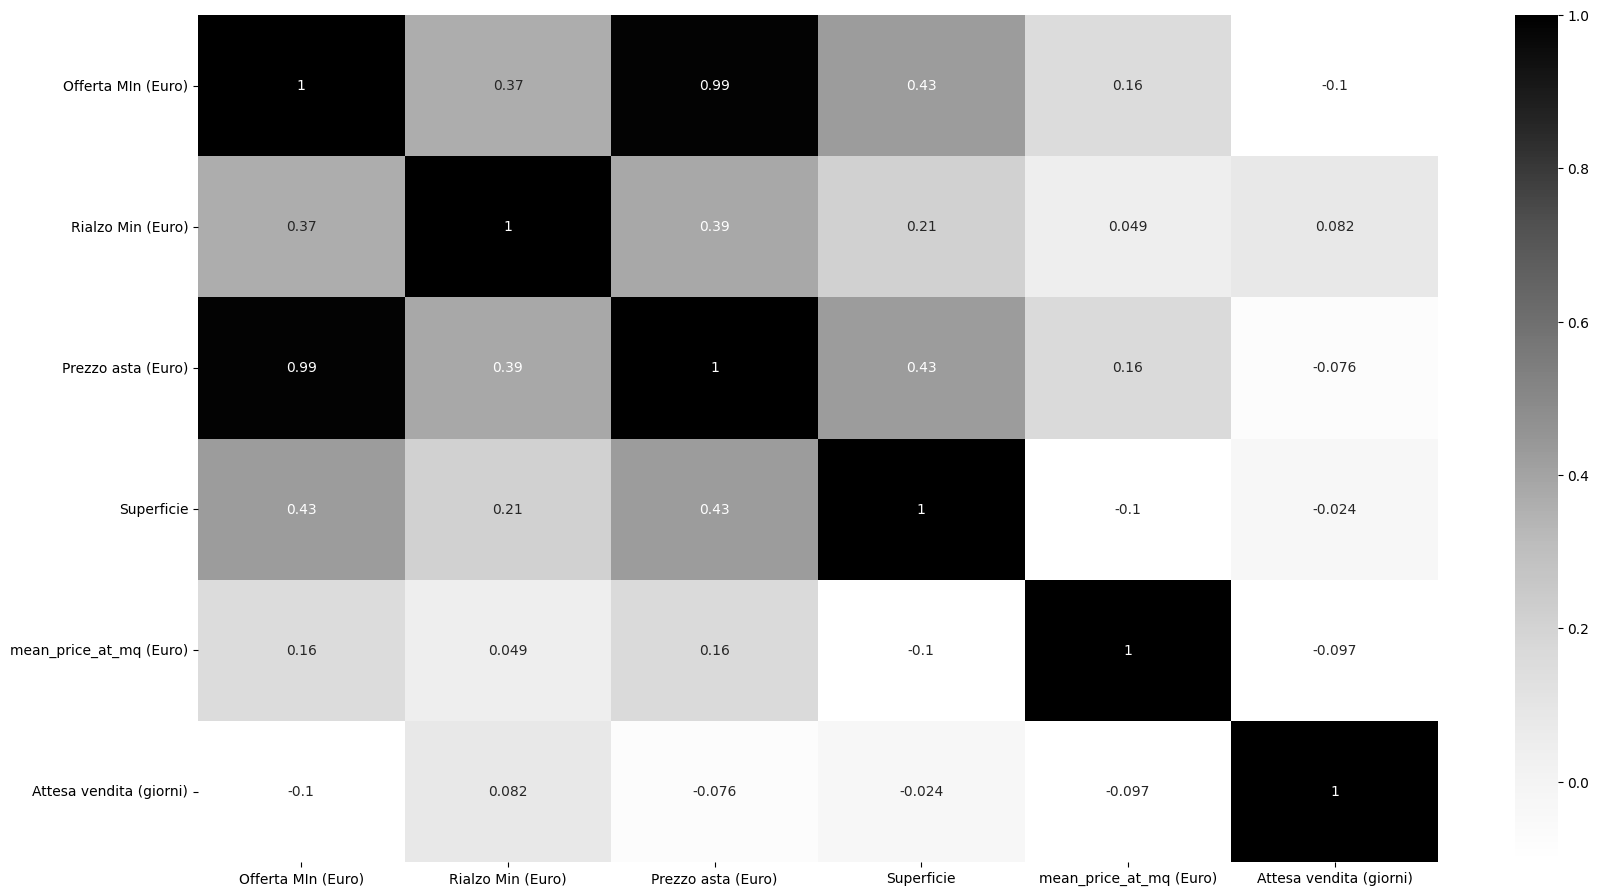

In [ ]:
corr = dataset_clean.iloc[:, [2, 3, 5, 12, 13, 14]].corr()
sns.heatmap(corr, cmap="Greys",annot=True)
plt.show()

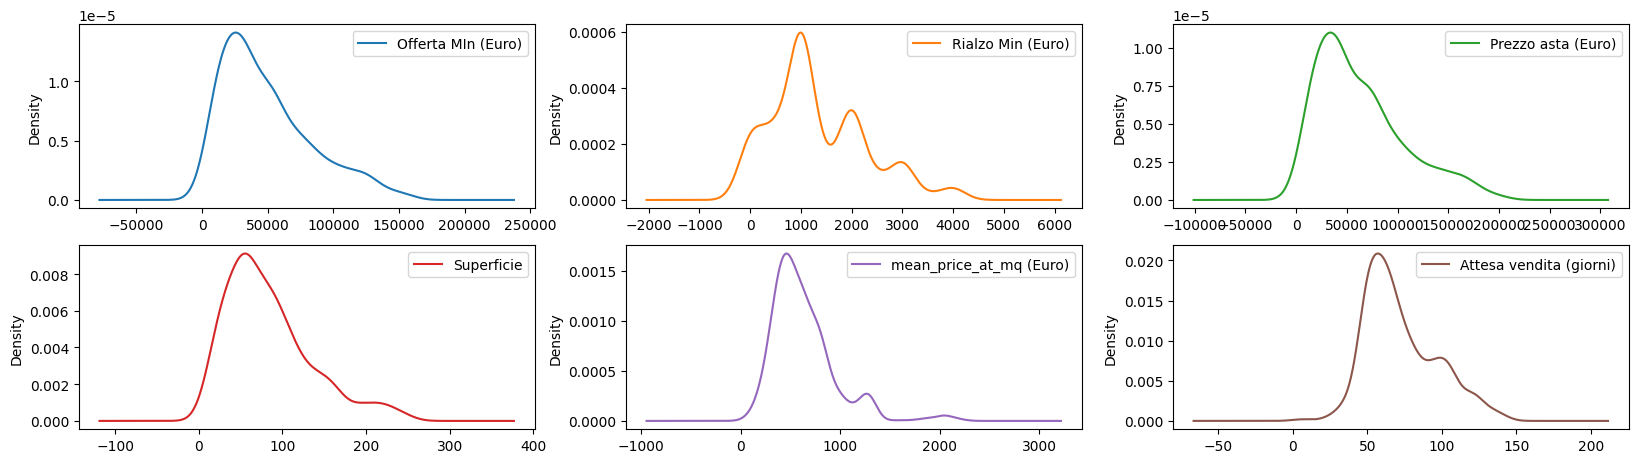

In [ ]:
dataset_clean.iloc[:, [2, 3, 5, 12, 13, 14]].plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

In [ ]:
dataset_clean.columns

Index(['Adv link', 'Data Vendita', 'Offerta MIn (Euro)', 'Rialzo Min (Euro)',
       'ID Procedura', 'Prezzo asta (Euro)', 'Pdfs links', 'Indirizzo',
       'Location', 'Ref prezzo location link', 'Date_adv', 'Tipologia',
       'Superficie', 'mean_price_at_mq (Euro)', 'Attesa vendita (giorni)',
       'latitudine_città', 'longitudine_città', 'latitudine_indirizzo',
       'longitudine_indirizzo'],
      dtype='object')

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# read in the dataset
df_c = dataset_clean.copy()
df_c = df_c[['Offerta MIn (Euro)','Rialzo Min (Euro)','ID Procedura','Prezzo asta (Euro)','Tipologia','Superficie','mean_price_at_mq (Euro)','Attesa vendita (giorni)', 'latitudine_città', 'longitudine_città','latitudine_indirizzo',
       'longitudine_indirizzo']]

# identify the categorical variables and encode them using label encoder
le = LabelEncoder()
df_c['Tipologia'] = le.fit_transform(df_c['Tipologia'])
df_c['ID Procedura'] = le.fit_transform(df_c['ID Procedura'])
df_c

,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Tipologia,Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
1,13125.00,500.0,489,17500.00,8,27.0,612.00,61,45.069817,11.788820,45.073668,11.800344
9,38251.16,1000.0,366,51046.88,8,127.0,822.80,68,45.694495,9.669873,45.679967,9.659337
11,30780.00,1000.0,476,41040.00,8,103.0,612.00,91,46.110980,12.097155,46.097726,12.086991
14,26863.54,2000.0,495,35818.06,8,64.0,782.00,59,28.431175,-81.447483,40.914108,14.794127
20,66000.00,1000.0,441,88000.00,8,176.0,1088.00,68,45.241768,11.750853,45.236903,11.748292
...,...,...,...,...,...,...,...,...,...,...,...,...
2836,36150.00,500.0,16,48200.00,8,24.0,1122.00,44,45.539802,10.220021,45.548406,10.219943
2840,29953.13,2000.0,301,39937.50,8,89.0,834.14,64,37.064614,15.290720,37.084033,15.274380
2841,21421.50,500.0,311,28562.00,8,102.0,374.00,49,43.218459,12.056781,43.211568,12.073004
2844,90000.00,2000.0,357,90000.00,8,117.0,935.00,62,45.502855,11.907496,45.494307,11.904827


In [ ]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_c.drop('Prezzo asta (Euro)', axis=1),
                                                    df_c['Prezzo asta (Euro)'], test_size=0.3, random_state=42)

# fit a random forest regressor to the training set
rf = RandomForestRegressor(n_estimators=600, random_state=42)
rf.fit(X_train, y_train)

# predict the "Attesa vendita (giorni)" for the testing set
y_pred = rf.predict(X_test)

# evaluate the model using mean absolute error metric
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2676.9562890700377
Root Mean Squared Error: 6575.659852090263


In [ ]:
dataset_clean.describe()

,Offerta MIn (Euro),Rialzo Min (Euro),Prezzo asta (Euro),Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,49324.333874,1337.207138,63819.794559,83.608270,629.910392,72.330794,41.438328,12.818638,42.408269,12.893633
std,34393.362935,961.526064,43817.505474,51.496906,322.428249,23.989001,8.569178,14.323184,2.653320,2.815730
min,801.000000,0.000000,1068.000000,5.000000,95.200000,3.000000,-38.293300,-121.800629,36.830333,7.322159
25%,23038.780000,663.690000,30320.000000,47.000000,418.200000,55.000000,40.623519,10.435668,40.678433,10.772493
50%,40500.000000,1000.000000,52627.000000,73.000000,564.400000,66.000000,42.519589,12.860439,42.487530,13.013410
75%,68242.500000,2000.000000,87100.000000,110.000000,765.000000,89.000000,44.977130,15.543259,45.002653,15.457342
max,158625.000000,4085.100000,205500.000000,253.000000,2176.000000,142.000000,51.535006,147.293503,46.504708,18.166708


In [ ]:
# Define the intervals and class names
intervals = range(0, 310000, 10000)
class_names = ['Class ' + str(i) for i in range(1, len(intervals))]

co = dataset_clean.copy()
# Assign a class to each price
co['Price Class'] = pd.cut(co['Prezzo asta (Euro)'], bins=intervals, labels=class_names)

In [ ]:
co

,Adv link,Data Vendita,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Prezzo asta (Euro),Pdfs links,Indirizzo,Location,Ref prezzo location link,Date_adv,Tipologia,Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo,Price Class
1,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-07,13125.00,500.0,835/2018,17500.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA FRATELLI CAIROLI , 6 E 8 - 45100 ROVIGO (RO)",Rovigo(RO),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-07,"Negozi, botteghe",27.0,612.00,61,45.069817,11.788820,45.073668,11.800344,Class 2
9,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-16,38251.16,1000.0,471/2016,51046.88,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA RAVIZZA , 1-9 BERGAMO (BG)",Bergamo(BG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-09,"Negozi, botteghe",127.0,822.80,68,45.694495,9.669873,45.679967,9.659337,Class 6
11,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-02-12,30780.00,1000.0,78/2012,41040.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA PANORAMICA, 3 - 32036 SEDICO (BL)",Sedico(BL),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",103.0,612.00,91,46.110980,12.097155,46.097726,12.086991,Class 5
14,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-11,26863.54,2000.0,86/2011,35818.06,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA FERRIERA 11 - 83100 AVELLINO (AV),Avellino(AV),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-13,"Negozi, botteghe",64.0,782.00,59,28.431175,-81.447483,40.914108,14.794127,Class 4
20,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-22,66000.00,1000.0,66/2017,88000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA SAN FILIPPO, - 35043 MONSELICE (PD)",Monselice(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-15,"Negozi, botteghe",176.0,1088.00,68,45.241768,11.750853,45.236903,11.748292,Class 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-12,36150.00,500.0,1061/2017,48200.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA BEZZECCA, 20 BRESCIA (BS)",Brescia(BS),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-10-29,"Negozi, botteghe",24.0,1122.00,44,45.539802,10.220021,45.548406,10.219943,Class 5
2840,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2019-01-04,29953.13,2000.0,356/2013,39937.50,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIALE SCALA GRECA N. 81 - 96100 SIRACUSA (SR),Siracusa(SR),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-01,"Negozi, botteghe",89.0,834.14,64,37.064614,15.290720,37.084033,15.274380,Class 4
2841,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-12-21,21421.50,500.0,373/2002,28562.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,VIA ROMA - 06069 TUORO SUL TRASIMENO (PG),Trasimeno(PG),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-11-02,"Negozi, botteghe",102.0,374.00,49,43.218459,12.056781,43.211568,12.073004,Class 3
2844,https://pvp.giustizia.it/pvp/it/dettaglio_annu...,2018-05-17,90000.00,2000.0,45/2014,90000.00,['https://pvp.giustizia.it/pvp-resources/cms/d...,"VIA ANTONIANA, 218/B - 35011 CAMPODARSEGO (PD)",Campodarsego(PD),https://www1.agenziaentrate.gov.it/servizi/geo...,2018-03-16,"Negozi, botteghe",117.0,935.00,62,45.502855,11.907496,45.494307,11.904827,Class 9


In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# read in the dataset
df_c = co.copy()
df_c = df_c[['Offerta MIn (Euro)','Rialzo Min (Euro)','ID Procedura','Price Class','Tipologia','Superficie','mean_price_at_mq (Euro)','Attesa vendita (giorni)', 'latitudine_città', 'longitudine_città','latitudine_indirizzo',
       'longitudine_indirizzo']]

# identify the categorical variables and encode them using label encoder
le = LabelEncoder()
df_c['Tipologia'] = le.fit_transform(df_c['Tipologia'])
df_c['ID Procedura'] = le.fit_transform(df_c['ID Procedura'])
df_c['Price Class'] = le.fit_transform(df_c['Price Class'])
df_c

,Offerta MIn (Euro),Rialzo Min (Euro),ID Procedura,Price Class,Tipologia,Superficie,mean_price_at_mq (Euro),Attesa vendita (giorni),latitudine_città,longitudine_città,latitudine_indirizzo,longitudine_indirizzo
1,13125.00,500.0,489,11,8,27.0,612.00,61,45.069817,11.788820,45.073668,11.800344
9,38251.16,1000.0,366,17,8,127.0,822.80,68,45.694495,9.669873,45.679967,9.659337
11,30780.00,1000.0,476,16,8,103.0,612.00,91,46.110980,12.097155,46.097726,12.086991
14,26863.54,2000.0,495,15,8,64.0,782.00,59,28.431175,-81.447483,40.914108,14.794127
20,66000.00,1000.0,441,20,8,176.0,1088.00,68,45.241768,11.750853,45.236903,11.748292
...,...,...,...,...,...,...,...,...,...,...,...,...
2836,36150.00,500.0,16,16,8,24.0,1122.00,44,45.539802,10.220021,45.548406,10.219943
2840,29953.13,2000.0,301,15,8,89.0,834.14,64,37.064614,15.290720,37.084033,15.274380
2841,21421.50,500.0,311,14,8,102.0,374.00,49,43.218459,12.056781,43.211568,12.073004
2844,90000.00,2000.0,357,20,8,117.0,935.00,62,45.502855,11.907496,45.494307,11.904827


In [ ]:
df_c['Price Class'].unique()

array([11, 17, 16, 15, 20, 18, 14,  6,  1, 19,  4,  7,  5,  3,  2,  0,  8,
        9, 10, 13, 12])

In [ ]:
# split the dataset into training and testing sets
X = df_c.drop(['Price Class'], axis=1)
Y = df_c['Price Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# create an instance of random forest classifier
rfc = RandomForestClassifier(n_estimators=500, random_state=0)

# fit the classifier to the training data
rfc.fit(X_train, Y_train)

# make predictions on the testing data
Y_pred = rfc.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = rfc.score(X_test, Y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

# calculate other useful metrics
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, Y_pred.round()))
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred.round()))

Accuracy: 71.20%

Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  2  4  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2]
 [ 0  1  0  3  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  1  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

SupportVectorClassifier: 0.297982 (0.045421)
StochasticGradientDecentC: 0.208090 (0.037540)
RandomForestClassifier: 0.722510 (0.040456)
DecisionTreeClassifier: 0.870733 (0.038124)
GaussianNB: 0.374121 (0.038771)
KNeighborsClassifier: 0.257183 (0.033930)
AdaBoostClassifier: 0.401499 (0.067911)
LogisticRegression: 0.374084 (0.030921)
XGBoost: 0.895131 (0.030810)


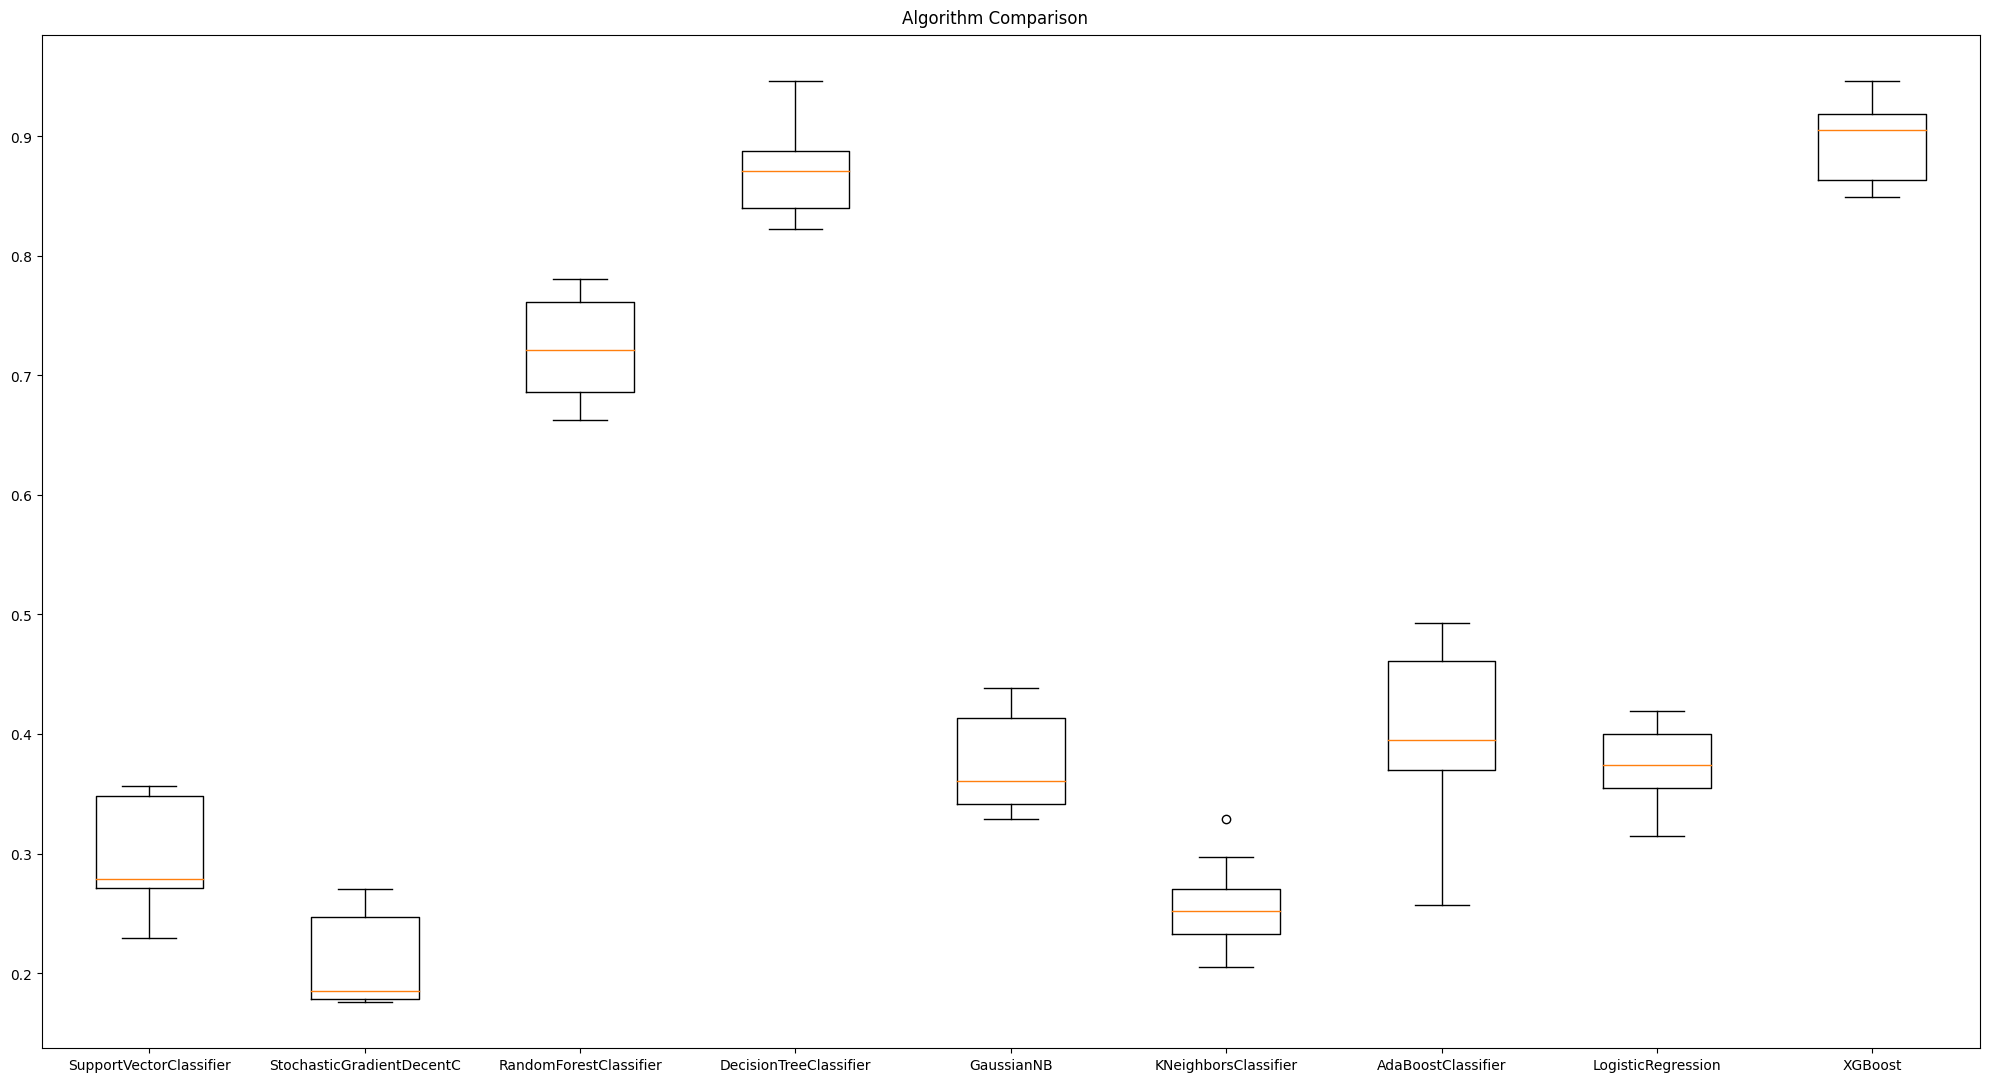

In [ ]:
X = df_c.drop(['Price Class'], axis=1)
Y = df_c['Price Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
x_train=sc.fit_transform(X_train)
x_test = sc.transform(X_test)
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('XGBoost', XGBClassifier(n_estimators = 500)))


# evaluate each model in turn
results = []
names = []
modelsMean = pd.DataFrame()

for name, model in models:
  cv_results = model_selection.cross_val_score(model, x_train, Y_train, cv = 10, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  modelsMean[name] = cv_results
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.tight_layout()
plt.show()

In [ ]:
models[8][1]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:


# create an instance of random forest classifier
xgb = models[8][1]

# fit the classifier to the training data
xgb.fit(X_train, Y_train)

# make predictions on the testing data
Y_pred = xgb.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = xgb.score(X_test, Y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

# calculate other useful metrics
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, Y_pred.round()))
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred.round()))

Accuracy: 90.22%

Confusion Matrix:
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 29  2  0  0  0  0]
 [ 0  0  0  0  0  0

In [ ]:
X = df_c.drop(['Price Class'], axis=1)
Y = df_c['Price Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
x_train=sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
xgb = models[8][1]

# fit the classifier to the training data
xgb.fit(x_train, Y_train)

# make predictions on the testing data
Y_pred = xgb.predict(x_test)

# evaluate the accuracy of the classifier
accuracy = xgb.score(x_test, Y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

# calculate other useful metrics
from sklearn.metrics import classification_report, confusion_matrix
print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, Y_pred.round()))
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred.round()))

Accuracy: 90.22%

Confusion Matrix:
[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 29  2  0  0  0  0]
 [ 0  0  0  0  0  0

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(200,100), max_iter=1000)
model.fit(x_train, Y_train)
predicted_class=model.predict(x_test)
accuracy = accuracy_score(Y_test,predicted_class)

print(accuracy)

0.5108695652173914


In [ ]:
print("Accuracy Score of MLP model is", accuracy_score(Y_test, predicted_class))
print("Confusion matrix for MLP Model is")
print(confusion_matrix(Y_test, predicted_class))
print("Classification Report of the MLP Model is")
print(classification_report(Y_test, predicted_class))

Accuracy Score of MLP model is 0.5108695652173914
Confusion matrix for MLP Model is
[[ 3  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  5  3  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  2  1  3  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  4  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0